# El tratamiento de las variables categóricas

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")

In [5]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [6]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender")# se crea variables dumix
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix = "City")# se crea variables dumix

In [7]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [8]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [9]:
column_names = df.columns.values.tolist() # convertimos las columnas a listas de df
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [10]:
df_new = df[column_names].join(dummy_gender) # agrego los Dumix con join a un nueco dataset
column_names = df_new.columns.values.tolist() # renuevo la lista del nuevo dataset
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [11]:
df_new = df_new[column_names].join(dummy_city_tier)# agrego el otro Dumix con join al nuevo dataset
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [12]:
# Selecionamos las columnas que queremos analizar
feature_cols = ["Monthly Income", "Transaction Time", 
                "Gender_Female", "Gender_Male", 
                "City_Tier 1", "City_Tier 2", "City_Tier 3",
                "Record"]

In [13]:
# CREAMOS LOS DOS DATASET PARA USAR LA LIBRERIA "LinearRegression"
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [14]:
lm = LinearRegression()# Nos crea el modelo
lm.fit(X,Y)# insertamos los parametros al modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# cortes y coeficientes
print("intercept_:",lm.intercept_)
print("coef_:",lm.coef_)

intercept_: -79.41713030137089
coef_: [ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [16]:
list(zip(feature_cols, lm.coef_)) # genero una tupla con las columnas y el coeficiente

[('Monthly Income', 0.14753898049205735),
 ('Transaction Time', 0.1549461254958957),
 ('Gender_Female', -131.02501325554607),
 ('Gender_Male', 131.0250132555461),
 ('City_Tier 1', 76.7643260104954),
 ('City_Tier 2', 55.13897430923231),
 ('City_Tier 3', -131.90330031972783),
 ('Record', 772.2334457445644)]

In [17]:
lm.score(X,Y)# validar lo bueno del modelo ( Factor R^2)

0.9179923586131016

### El modelo puede ser escrito como:
* **Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Gender_Female'* -131.02501325554567 + 'Gender_Male'* 131.0250132555456+'City_Tier 1'* 76.76432601049527 + 'City_Tier 2'* 55.138974309232474 + 'City_Tier 3'* -131.9033003197278+'Record'* 772.2334457445648**

    * Si es hombre y vive en CT1: Total_Spend = 128.37220896466724 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Record'* 772.2334457445648
    * Si es hombre y vive en CT2: Total_Spend = 106.74685726340445 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 +'Record'* 772.2334457445648
    * Si es hombre y vive en CT3: Total_Spend = -80.29541736555583 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Record'* 772.2334457445648
    * Si es mujer y vive en CT1: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456+ 76.76432601049527 +'Record'* 772.2334457445648
    * Si es mujer y vive en CT2: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456+ 55.138974309232474  +'Record'* 772.2334457445648
    * Si es mujer y vive en CT3: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456-131.9033003197278 +'Record'* 772.2334457445648

In [18]:
 -79.41713030137362 + 131.0250132555456 - 131.9033003197278

-80.29541736555583

In [19]:
# predicion de gastos
df_new["prediction"] = -79.41713030137362 + df_new['Monthly Income']*0.14753898049205738 + df_new['Transaction Time']* 0.15494612549589545+ df_new['Gender_Female'] * (-131.02501325554567) + df_new['Gender_Male'] * 131.0250132555456+ df_new['City_Tier 1']* 76.76432601049527 +  df_new['City_Tier 2']* 55.138974309232474 + df_new['City_Tier 3']* (-131.9033003197278)+ df_new['Record']* 772.2334457445648

In [20]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [21]:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2)

In [22]:
SSD

1517733985.3408163

In [23]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))

In [24]:
RSE

803.1318809818165

In [25]:
sales_mean=np.mean(df_new["Total Spend"])

In [26]:
sales_mean

6163.176415976714

In [27]:
error = RSE/sales_mean

In [28]:
error*100

13.031135680294161

### Otra forma más simple de calcular las predicciones
Otra posible forma de hacer el cálculo de las predicciones podría ser en usando la función predict del modelo lineal y añadiendolo como columna adicional al data frame:


In [29]:
df_new["prediction"] = lm.predict(pd.DataFrame(df_new[feature_cols]))
df_new

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,0,1,0,1,0,3336.456655
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,0,1,0,1,0,8069.348522
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,1,0,0,0,1,9050.690358
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,1,0,1,0,0,8220.596094


# Eliminar variables dummy redundantes

In [30]:
dummy_gender.head()# dumi original

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [31]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:] #>>>> .iloc[:,1:] toma el ultima columna
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [32]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [33]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]# toma las penultimas .iloc[filas(0:n),Column(1:n)]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [37]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [38]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()# vuelvo a tomar las columnas
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [39]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]
X = df_new[feature_cols]# me quedo con la columnas predictoras
Y = df_new["Total Spend"] # El valor que quiero predecir
lm = LinearRegression()# modelo lineal
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
print(lm.intercept_) # el numero del origen 

-133.67781754642238


In [79]:
list(zip(feature_cols, lm.coef_))# listo los coeficientes

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589631),
 ('Gender_Male', 262.05002651109595),
 ('City_Tier 2', -21.62535170126296),
 ('City_Tier 3', -208.66762633022324),
 ('Record', 772.2334457445635)]

In [80]:
lm.score(X,Y)

0.9179923586131016

### Coeficientes con todas las variables en el modelo
* ('Monthly Income', 0.14753898049205738),
* ('Transaction Time', 0.15494612549589545),
* ('Gender_Female', -131.02501325554567),
* ('Gender_Male', 131.0250132555456),
* ('City_Tier 1', 76.76432601049527),
* ('City_Tier 2', 55.138974309232474),
* ('City_Tier 3', -131.9033003197278),
* ('Record', 772.2334457445648)
 
###  Coeficientes tras enmascarar las variables dummy pertinentes
* 'Monthly Income', 0.14753898049205744),
* ('Transaction Time', 0.15494612549589631),
* ('Gender_Male', 262.05002651109595),
* ('City_Tier 2', -21.62535170126296),
* ('City_Tier 3', -208.66762633022324),
* ('Record', 772.2334457445635)]

### Los cambios se reflejan en
* Gender_Male: 
    * antes -> 131.02, 
    * después -> 262.05 = ( 131.02 - (-131.02))
* Gender_Female: 
    * antes -> -131.02,
    * después -> 0
* CT1: 
    * antes -> 76.76,
    * después -> 0
* CT2: 
    * antes -> 55.13, 
    * después -> -21.62 = (55.13 - 76.76)
* CT3: 
    * antes -> -131.90, 
    * después -> -208.66 = (-131.90 - 76.76)

# Transformación de variables para conseguir una relación no lineal

In [41]:
import pandas as pd

In [42]:
data_auto = pd.read_csv("../datasets/auto/auto-mpg.csv")# consumo de combustible 
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [43]:
data_auto.shape

(406, 9)

In [49]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

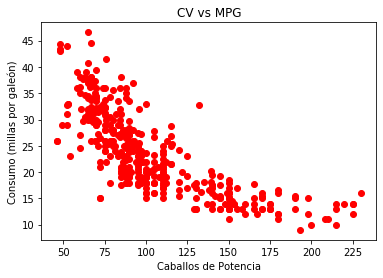

In [50]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()# Elimino NaN
data_auto["horsepower"] = data_auto["horsepower"].dropna() # Elimino NaN
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de Potencia")
plt.ylabel("Consumo (millas por galeón)")
plt.title("CV vs MPG")

### Modelo de regresión lineal
* mpg = a + b * horsepower

In [58]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())#REMPLAZA LOS NaN POR EL PROMEDIO
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())#REMPLAZA LOS NaN POR EL PROMEDIO
X_data = X[:,np.newaxis]# Como X es un core.series, le  creo una nueva dimension para poder operar y sea numpy.ndarray

In [59]:
print("X:",X)
print("X_data:",X_data)

X: 0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
401     86.0
402     52.0
403     84.0
404     79.0
405     82.0
Name: horsepower, Length: 406, dtype: float64
X_data: [[130.    ]
 [165.    ]
 [150.    ]
 [150.    ]
 [140.    ]
 [198.    ]
 [220.    ]
 [215.    ]
 [225.    ]
 [190.    ]
 [115.    ]
 [165.    ]
 [153.    ]
 [175.    ]
 [175.    ]
 [170.    ]
 [160.    ]
 [140.    ]
 [150.    ]
 [225.    ]
 [ 95.    ]
 [ 95.    ]
 [ 97.    ]
 [ 85.    ]
 [ 88.    ]
 [ 46.    ]
 [ 87.    ]
 [ 90.    ]
 [ 95.    ]
 [113.    ]
 [ 90.    ]
 [215.    ]
 [200.    ]
 [210.    ]
 [193.    ]
 [ 88.    ]
 [ 90.    ]
 [ 95.    ]
 [105.0825]
 [ 48.    ]
 [100.    ]
 [105.    ]
 [100.    ]
 [ 88.    ]
 [100.    ]
 [165.    ]
 [175.    ]
 [153.    ]
 [150.    ]
 [180.    ]
 [170.    ]
 [175.    ]
 [110.    ]
 [ 72.    ]
 [100.    ]
 [ 88.    ]
 [ 86.    ]
 [ 90.    ]
 [ 70.    ]
 [ 76.    ]
 [ 65.    ]
 [ 69.    ]
 [ 60.    ]
 [ 70.    ]
 [ 95.    ]
 [ 80.    ]
 [ 54.  

In [60]:
lm = LinearRegression() # genero la funcion lineal 
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
type(X)

pandas.core.series.Series

In [61]:
type(X_data)

numpy.ndarray

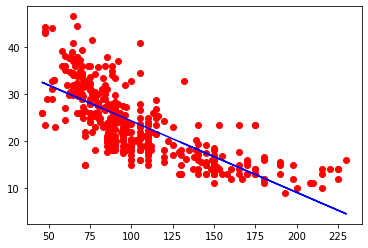

In [62]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X_data), color="blue")# pinta en azul la predicion

In [64]:
lm.score(X_data, Y) # factor de R^2

0.574653340645025

In [102]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100
# SSD = suma de los cuadrados por las diferencias
# RSE = Desviacionr tipica
# y_mean = promedio de millas por galon
# error = % de error

(10315.75196006092, 5.046879480825511, 23.51457286432162, 21.46277336163346)

## Modelo de regresión cuadrático
* mpg = a + b * horsepower^2 

In [65]:
X_data = X**2
X_data = X_data[:,np.newaxis]# formateo para creo una nueva dimension para poder operar y sea numpy.ndarray

In [66]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
lm.score(X_data, Y)

0.4849887034823205

In [68]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.51457286432162, 23.6168898529981)

## Modelo de regresión  lineal y cuadrático
* mpg = a + b * horsepower + c * horsepower^2

In [74]:
from sklearn.preprocessing import PolynomialFeatures # cargamos librerias para trabajar con polinomios
from sklearn import linear_model

In [75]:
poly = PolynomialFeatures(degree=2)# usamos una tranformacion polinomial de grado "2" = (degree=2)

In [76]:
X_data = poly.fit_transform(X[:,np.newaxis])# transformamos a X de forma polinomial y la convertivos en numpy.ndarray

In [77]:
lm = linear_model.LinearRegression() # de sklearn tomamos la ecuacion lineal + polinomica
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
lm.score(X_data, Y)# Nos aumenta el factor R^2 significativamente

0.6439066584257469

In [81]:
lm.intercept_

55.02619244708123

In [82]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

### Modelo resultante
#### mpg = 55.026 - 0.434 * hp + 0.00112615 * hp^2

In [86]:
for d in range(2,11):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresión de grado "+str(d))
    print("R2:" +str(lm.score(X_data, Y)))
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validation(X_data, Y, lm.predict(X_data))

Regresión de grado 2
R2:0.6439066584257469
55.02619244708123
[ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502, RSE: 4.61778115803654, Y_mean: 23.51457286432162, error: 19.63795466190689%
Regresión de grado 3
R2:0.6444678885560742
58.448774111672364
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.569367428552, RSE: 4.614140736300908, Y_mean: 23.51457286432162, error: 19.622473106036676%
Regresión de grado 4
R2:0.6467674189704503
40.09664386273736
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD: 8566.79983249135, RSE: 4.599194731579757, Y_mean: 23.51457286432162, error: 19.558912501268775%
Regresión de grado 5
R2:0.6547512491826567
-40.69399205479398
[ 0.00000000e+00  4.00021890e+00 -7.54802463e-02  6.19621638e-04
 -2.36220983e-06  3.41983064e-09]
SSD: 8373.171387671173, RSE: 4.546921733822683, Y_mean: 23.51457286432162, error: 19.336612066305793%
Regresión de grado 6
R2:0.6572723767672353
-156.96985401640967


In [88]:
def regresion_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("SSD: "+str(SSD)+", RSE: " +str(RSE) + ", Y_mean: " +str(y_mean) +", error: " + str(error*100)+ "%")

In [90]:
#print(regresion_validation(lm, X_data, Y))

# El problema de los outliers

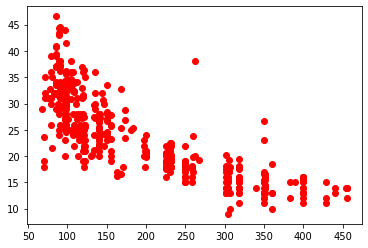

In [92]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")

In [93]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())# remplazo los nan por el promedio
X = X[:,np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())# remplazo los nan por el promedio

lm = LinearRegression() 
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
lm.score(X,Y) # factor

0.6261049762826918

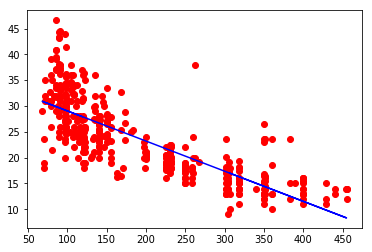

In [150]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X), color="blue")

### Filtrar para encontrar outliers

In [96]:
data_auto[(data_auto["displacement"]>250) & (data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [97]:
data_auto[(data_auto["displacement"] > 300) & (data_auto["mpg"] > 20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


### Borrar las filas puntuales 

In [98]:
data_auto_clean = data_auto.drop([395, 258, 305, 372]) # borro filas

In [99]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X = X[:,np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())

lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
lm.score(X,Y)# mejora un poquito

0.6466514317531822

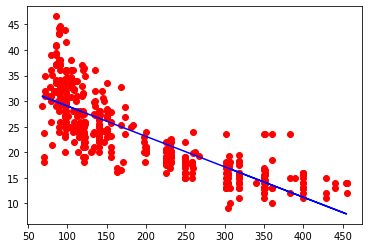

In [101]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X), color="blue")